In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from model import *

unlabel_prob = 0.95 # probability of labels to be unlabeled
percentile = 0     # when a graph is not given, construct a graph 
                    # dropping nodes under this percentile 

iris = False        # use iris data
hard = False
sigma = 1.5           # sigma hyperparameter for RBF kernel

%matplotlib inline

### Get Data

In [2]:
if iris:
    true_labels, features, graph = Data.Data.load_iris()
else:
    true_labels, features, graph = Data.Data.load_cora()

In [3]:
labels, is_labeled, labeled_indices, unlabeled_indices = utils.random_unlabel(true_labels,unlabel_prob=unlabel_prob,hard=hard)
solution  = true_labels[unlabeled_indices]
weights   = utils.rbf_kernel(features,s=sigma,G=graph,percentile=percentile)
num_nodes = len(labels)
data, validation_data = Data.Data.prepare(labels,labeled_indices,true_labels)

graph given


In [4]:
weights

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
baseline_prediction = np.rint(labels[unlabeled_indices])
print("[Baseline]　Accuracy:", utils.accuracy(solution, baseline_prediction), 
      "RMSE:", utils.rmse(solution, baseline_prediction))

[Baseline]　Accuracy: 0.707203389831 RMSE: 0.292796610169


### Label Propagation

In [6]:
lp = LP.LP()
# lp_closed_prediction = np.rint(lp.closed(labels,
#                                   weights,
#                                   labeled_indices,
#                                   unlabeled_indices))
lp_iter_prediction = np.rint(lp.iter(labels,
                                  weights,
                                  is_labeled,
                                  num_iter=100))

In [7]:
# print("[Closed]　Accuracy:", utils.accuracy(solution, lp_closed_prediction), 
#       "RMSE:", utils.rmse(solution, lp_closed_prediction))
print("[Iter]　Accuracy:", utils.accuracy(solution, lp_iter_prediction[unlabeled_indices]), 
      "RMSE:", utils.rmse(solution, lp_iter_prediction[unlabeled_indices]))

[Iter]　Accuracy: 0.823728813559 RMSE: 0.176271186441


In [65]:
for num_iter in [1,2,3,4,5,10,100,1000,2000]:
    print(num_iter)
    lp_iter_prediction = np.rint(lp.iter(labels,
                                  weights,
                                  is_labeled,
                                  num_iter=num_iter))
#     print("Objective:", utils.objective(labels[labeled_indices],lp_iter_prediction,weights))
    print("Accuracy:", utils.accuracy(solution,lp_iter_prediction[unlabeled_indices]))
    print("RMSE:", utils.rmse(solution,lp_iter_prediction[unlabeled_indices]))

1
Accuracy: 0.716949152542
RMSE: 0.283050847458
2
Accuracy: 0.774576271186
RMSE: 0.225423728814
3
Accuracy: 0.829237288136
RMSE: 0.170762711864
4
Accuracy: 0.855084745763
RMSE: 0.144915254237
5
Accuracy: 0.865254237288
RMSE: 0.134745762712
10
Accuracy: 0.881355932203
RMSE: 0.118644067797
100
Accuracy: 0.823728813559
RMSE: 0.176271186441
1000
Accuracy: 0.783050847458
RMSE: 0.216949152542
2000
Accuracy: 0.783050847458
RMSE: 0.216949152542


### DeepLP

In [66]:
dlp = DeepLP.DeepLP(100,num_nodes,weights,0.1)
pred, _ = dlp.labelprop(validation_data)
dlp_prediction = np.rint(pred).reshape(num_nodes)[unlabeled_indices]
print("[DeepLP]　Accuracy:", utils.accuracy(solution, dlp_prediction), 
      "RMSE:", utils.rmse(solution, dlp_prediction))


{'loss': 0.13140424, 'labeled_loss': 0.0, 'accuracy': 0.8237288, 'true_loss': 0.13140424, 'true_accuracy': 0.8237288}
[DeepLP]　Accuracy: 0.823728813559 RMSE: 0.176271186441


### DeepLP_RBF

In [16]:
dlp_rbf = DeepLP_RBF.DeepLP_RBF(100, num_nodes, features, graph, 1, 1)

In [17]:
dlp_rbf_prediction,_ = dlp_rbf.labelprop(validation_data)

{'loss': 0.13427219, 'labeled_loss': 0.0, 'accuracy': 0.87203389, 'true_loss': 0.13427219, 'true_accuracy': 0.87203389}


In [ ]:
dlp_rbf.train(data,validation_data,200)

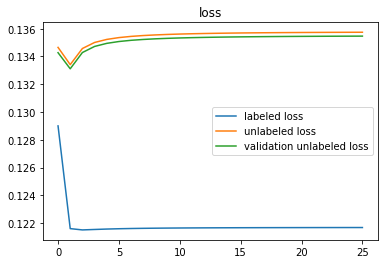

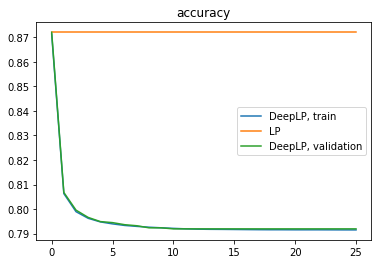

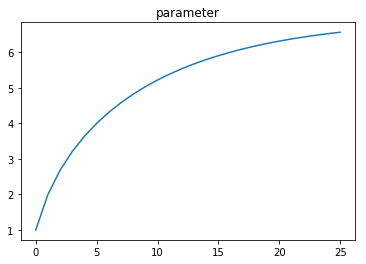

In [19]:
dlp_rbf.plot()

# DeepLP_WeightedRBF

In [81]:
theta = np.ones(features.shape[1]).reshape(1,features.shape[1])
dlp_wrbf = DeepLP_WeightedRBF.DeepLP_WeightedRBF(100, num_nodes, features, graph, sigma, theta, 1, regularize=0)
dlp_wrbf_prediction = np.rint(dlp_wrbf.labelprop(validation_data)).reshape(num_nodes)[unlabeled_indices]
print("[DeepLP Weighted RBF]　Accuracy:", utils.accuracy(solution, dlp_wrbf_prediction), 
      "RMSE:", utils.rmse(solution, dlp_wrbf_prediction))

TypeError: labelprop() takes 2 positional arguments but 3 were given

In [20]:
theta = np.ones(features.shape[1]).reshape(1,features.shape[1])

In [21]:
dlp_wrbf = DeepLP_WeightedRBF.DeepLP_WeightedRBF(100, num_nodes, features, graph, 1, theta, lr = 0.1, regularize = 0.1)
dlp_wrbf_prediction,_ = dlp_wrbf.labelprop(validation_data)


{'loss': 0.13427219, 'labeled_loss': 0.0, 'accuracy': 0.87203389, 'true_loss': 0.13427219, 'true_accuracy': 0.87203389}


In [23]:
dlp_wrbf.train(data,validation_data,200)

epoch: -1 labeled loss: 0.128999 unlabeled loss: 0.134654 accuracy: 0.871285 true unlabeled loss: 0.134272 true accuracy: 0.872034
--- 35.948538064956665 seconds ---
theta: [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.]]
--- 12.454074144363403 seconds ---
epoch: 0 labeled loss: 0.123153 unlabeled loss: 0.130847 accuracy: 0.845706 true unlabeled loss: 0.130488 true accuracy: 0.845763
--- 4.892277717590332 seconds ---
theta: [[ 0.90000582  1.09999502  0.90001118  1.09999359  0.90001673  0.90001369
   0.90000582  0.90008932  0.90001011  0.90000749  1.09999108  1.09997725
   0.90000975  0.90000558  0.90001547  0.90001357  0.9000051   0.90003538
   0.90000659]]
--- 16.846147060394287 seconds ---
epoch: 1 labeled loss: 0.118511 unlabeled loss: 0.128791 accuracy: 0.840684 true unlabeled loss: 0.128452 true accuracy: 0.841525
--- 5.917832851409912 seconds ---
theta: [[ 0.80330467  1.19885576  0.80995798  1.19933438  0.80463284  0.80923569
   0.80616695  0.9321

KeyboardInterrupt: 

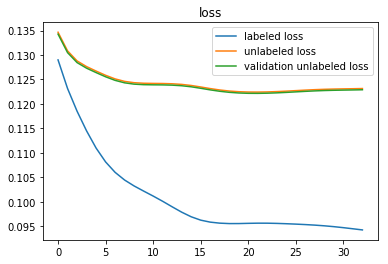

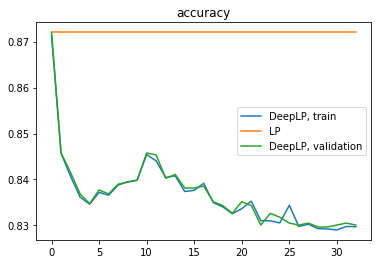

ValueError: x and y can be no greater than 2-D, but have shapes (33,) and (33, 1, 19)

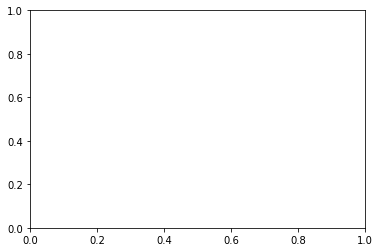

In [24]:
dlp_wrbf.plot()

In [25]:
a = dlp_wrbf.thetas

In [26]:
res=[]
for el in a:
    res.append(list(el[0]))

In [27]:
a = np.array(res)

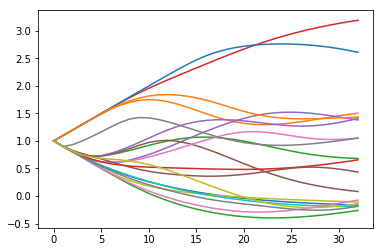

In [28]:
plt.plot(a)

In [9]:
sigmas = [i for i in np.arange(0.1,5,0.1)]

In [13]:
from scipy.spatial.distance import pdist, squareform
import scipy as sp
def rbf_kernel(X,theta,s=3,G=[],percentile=3):
    '''
    Use RBF kernel to calculate the weights of edges.
    If given a graph G, drop edges not in G.
    If not, drop edges that are not in the top percentile.
    '''
    # use rbf kernel to estimate weights
    X = theta * X
    pairwise_dists = squareform(pdist(X, 'euclidean'))
    K = sp.exp(-pairwise_dists ** 2 / s ** 2)
#     X = theta * X
#     norm = (np.sum(np.abs(X)**2,axis=-1)**(1./2)).reshape(1,2485)
#     K = np.exp((1 - X @ X.T / (norm.T @ norm) * s ** 2))

    if G == []:
        print('graph constructed')
        threshold = np.percentile(K,percentile)
        np.fill_diagonal(K, 0)

        Knew = (K * K > threshold)
        argmax = np.argmax(K,axis=1)
        Knew[np.arange(len(K)), argmax] = K[np.arange(len(K)), argmax]
        Knew[argmax,np.arange(len(K))] = K[np.arange(len(K)), argmax]
        K = Knew
    else:
        print('graph given')
        K = K * G

    return K

In [ ]:
    dlp_rbf = DeepLP_RBF.DeepLP_RBF(100, num_nodes, features, graph, sigma_, 0.1)
    pred,metrics = dlp_rbf.labelprop(data)

In [25]:
y            = tf.placeholder("float", shape=[1,3])
yhat            = tf.placeholder("float", shape=[2,3])

In [26]:
sess=tf.Session()


In [29]:
sess.run(tf.multiply(yhat,y),feed_dict={y:np.array([[1,2,3]]),yhat:np.array([[1,2,3],[4,5,6]])})

array([[  1.,   4.,   9.],
       [  4.,  10.,  18.]], dtype=float32)

In [22]:
data['masked']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [19]:
dlp_rbf._eval(dlp_rbf.yhat,data)

FailedPreconditionError: Attempting to use uninitialized value Variable_46
	 [[Node: Variable_46/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_46"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_46)]]

Caused by op 'Variable_46/read', defined at:
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-d1f6408fa589>", line 5, in <module>
    dlp_rbf = DeepLP_RBF.DeepLP_RBF(100, num_nodes, features, graph, sigma_, 0.1)
  File "/Users/kojin/projects/graph_based_semi_supervised_learning/model/DeepLP_RBF.py", line 24, in __init__
    self.sigma   = tf.Variable(sigma, dtype=tf.float32)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 316, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1338, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/kojin/anaconda/envs/ml/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_46
	 [[Node: Variable_46/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_46"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_46)]]


In [53]:
graph = weights > 0

In [41]:
np.sum(weights)

4205.842258470374

In [54]:
graph

array([[False,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False]], dtype=bool)

In [74]:
sigmas = [i for i in np.arange(0.3,4,0.1)]
lolosses = []
accuracies = []
for i,sigma_ in enumerate(sorted(sigmas)):
    dlp_rbf = DeepLP_RBF.DeepLP_RBF(100, num_nodes, features, graph, sigma_, 0.1)
    pred,metrics = dlp_rbf.labelprop(data)
    lolosses.append(metrics['labeled_loss'])
    accuracies.append(metrics['accuracy'])
    print(i,lolosses[-1],accuracies[-1])

{'loss': 0.23238951, 'labeled_loss': 0.22380109, 'accuracy': 0.72415078, 'true_loss': 29.049143, 'true_accuracy': 90.516525}
0 0.223801 0.724151
{'loss': 0.22933, 'labeled_loss': 0.22150078, 'accuracy': 0.78902501, 'true_loss': 28.666664, 'true_accuracy': 98.627968}
1 0.221501 0.789025
{'loss': 0.21277826, 'labeled_loss': 0.20819628, 'accuracy': 0.84215504, 'true_loss': 26.597527, 'true_accuracy': 105.26991}
2 0.208196 0.842155
{'loss': 0.18930146, 'labeled_loss': 0.18676446, 'accuracy': 0.88537741, 'true_loss': 23.662817, 'true_accuracy': 110.67458}
3 0.186764 0.885377
{'loss': 0.16607875, 'labeled_loss': 0.16302545, 'accuracy': 0.88968742, 'true_loss': 20.760008, 'true_accuracy': 111.21272}
4 0.163025 0.889687
{'loss': 0.14951381, 'labeled_loss': 0.14472817, 'accuracy': 0.8913613, 'true_loss': 18.68948, 'true_accuracy': 111.42161}
5 0.144728 0.891361
{'loss': 0.13979338, 'labeled_loss': 0.13406181, 'accuracy': 0.89203221, 'true_loss': 17.474478, 'true_accuracy': 111.50594}
6 0.134062

KeyboardInterrupt: 

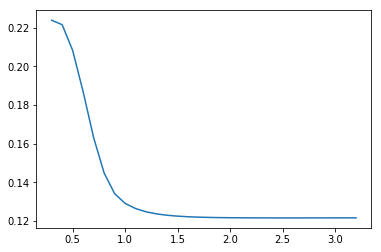

In [75]:
plt.plot(sigmas[:30],lolosses[:30])


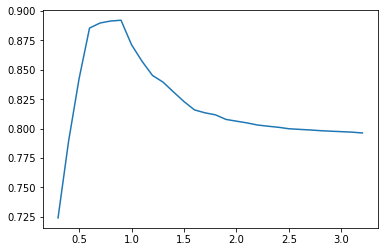

In [76]:
plt.plot(sigmas[:30],accuracies[:30])

In [72]:
sigmas = [i for i in np.arange(0.1,4,0.1)]

In [73]:
accuracies_dlp = []
rmses_dlp = []
accuracies_lp = []
rmses_lp = []

for i,sigma_ in enumerate(sorted(sigmas)):
    print(i)
    if i % 50 == 0:
        print(i)
        
    weights   = utils.rbf_kernel(features,s=sigma_,G=graph,percentile=percentile)    
#     theta_ = np.random.uniform(0.5,4,features.shape[1])
#     weights = rbf_kernel(features,theta=theta_,s=sigma,G=graph,percentile=percentile)    
    lp = LP.LP()
    lp_iter_prediction = np.rint(lp.iter(labels,
                                      weights,
                                      labeled_indices,
                                      unlabeled_indices,
                                      num_iter=100))
    accuracy_lp = utils.accuracy(solution, lp_iter_prediction)
    rmse_lp = utils.rmse(solution, lp_iter_prediction)
    accuracies_lp.append(accuracy_lp)
    rmses_lp.append(rmse_lp)
    
    dlp_rbf = DeepLP_RBF.DeepLP_RBF(100, num_nodes, features, graph, sigma_, 0.1)
    dlp_rbf_prediction = np.rint(dlp_rbf.labelprop(validation_data,sigma_)).reshape(num_nodes)[unlabeled_indices]
    accuracy_dlp = utils.accuracy(solution, dlp_rbf_prediction)
    rmse_dlp = utils.rmse(solution, dlp_rbf_prediction)
    accuracies_dlp.append(accuracy_dlp)
    rmses_dlp.append(rmse_dlp)

    print(sigma_,accuracies_lp[-1],accuracies_dlp[-1])
#     print(sigma_,accuracies_lp[-1])
#     print(sigma_,accuracies_lp[-1])

0
0
graph given


TypeError: iter() got multiple values for argument 'num_iter'

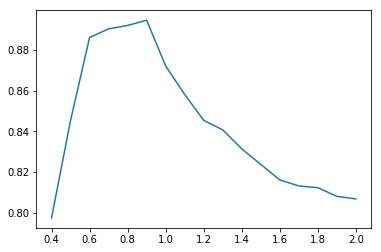

In [10]:

plt.plot(sigmas[3:20],accuracies_dlp[3:20])
plt.show()

In [9]:
accuracies_dlp

[0.0,
 0.0,
 0.73135593220338979,
 0.7974576271186441,
 0.84533898305084743,
 0.88601694915254237,
 0.89025423728813557,
 0.89194915254237284,
 0.89449152542372878,
 0.87203389830508471,
 0.85805084745762716,
 0.84533898305084743,
 0.84067796610169487,
 0.83135593220338988,
 0.82372881355932204,
 0.81610169491525419,
 0.81313559322033901,
 0.81228813559322033,
 0.80805084745762712,
 0.8067796610169492,
 0.8046610169491526,
 0.80381355932203391,
 0.80296610169491522,
 0.80127118644067796]

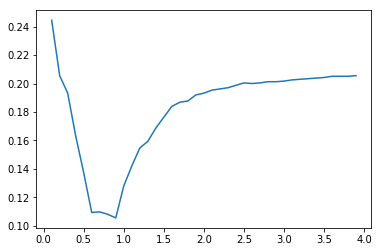

In [31]:
plt.plot(sigmas,rmses_lp)
# plt.plot(sigmas[:20],accuracies_dlp[:20])
plt.show()

In [30]:
accuracies_lp[-1]

0.764406779661017

In [39]:
features

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [25]:
accuracies_dlp

[0.0,
 0.0,
 0.0,
 0.8182203389830508,
 0.81864406779661014,
 0.83220338983050846,
 0.84067796610169487,
 0.84999999999999998,
 0.84788135593220337,
 0.84745762711864403,
 0.84322033898305082,
 0.83940677966101696,
 0.83305084745762714,
 0.83305084745762714,
 0.83559322033898309,
 0.8347457627118644,
 0.83432203389830506,
 0.83432203389830506,
 0.83389830508474572,
 0.83347457627118648,
 0.83389830508474572,
 0.83516949152542375,
 0.8347457627118644,
 0.83432203389830506]

In [24]:
len(accuracies_dlp),len(accuracies_lp)

(24, 25)

In [39]:



def _get_val(val):
    return sess.run(val)

def _init_weights(weights_np):
    """ Weight initialization. """
    weights = tf.convert_to_tensor(weights_np, np.float32)
    return tf.Variable(weights)

def _tnorm(weights):
    Tnorm = weights / tf.reduce_sum(weights, axis = 1, keep_dims=True)
    return Tnorm

def _forwardprop(X,
                       weights,
                       labeled,
                       num_iter):
    '''
    Forward prop which mimicks LP.
    '''

    Tnorm = _tnorm(weights)

    def layer(i,h,X,Tnorm):
        # propagate labels
        h = tf.matmul(h,Tnorm,transpose_b=True)
        # don't update labeled nodes
        h = tf.multiply(h, (1-labeled)) + tf.multiply(X, labeled)
        return [i+1,h,X,Tnorm]

    def condition(i,X,trueX,Tnorm):
        return num_iter > i

    _,yhat,_,_ = tf.while_loop(condition, layer, loop_vars=[0,X,X,Tnorm])
    return yhat

def _regularize_loss():
    return 0
    # tf.nn.l2_loss(theta-1)
    
# set instance variables
num_iter     = 100
lr           = 0.1
regularize   = False
graph_sparse = False
print_freq   = 10
multi_class  = False

weights      = _init_weights(weights)

# initialize placeholders
shape             = [None, num_nodes]
X            = tf.placeholder("float", shape=shape)
y            = tf.placeholder("float", shape=shape)
labeled      = tf.placeholder("float", shape=shape)
true_labeled = tf.placeholder("float", shape=shape)
masked       = tf.placeholder("float", shape=shape)

yhat         = _forwardprop(X,
                                      weights,
                                      labeled,
                                      num_iter)


In [40]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [41]:
yhatnp = sess.run(yhat,feed_dict={X:data['X'],
                                              y:data['y'],
                                              labeled:data['labeled'],
                                              true_labeled:data['true_labeled'],
                                              masked:data['masked']})

In [10]:
def _calc_loss(y,yhat,mask):
    loss_mat = tf.multiply(mask, (y-yhat) ** 2 )
    return tf.reduce_sum(loss_mat) / tf.count_nonzero(mask,dtype=tf.float32)


In [21]:
data['masked']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [11]:
y,yhat,masked

(<tf.Tensor 'Placeholder_1:0' shape=(?, 2485) dtype=float32>,
 <tf.Tensor 'while/Exit_1:0' shape=(?, 2485) dtype=float32>,
 <tf.Tensor 'Placeholder_4:0' shape=(?, 2485) dtype=float32>)

In [16]:
res = _calc_loss(y,yhat,masked)

In [17]:
resval = sess.run(res,feed_dict={X:data['X'],
                                              y:data['y'],
                                              labeled:data['labeled'],
                                              true_labeled:data['true_labeled'],
                                              masked:data['masked']})

In [23]:
data

{'X': array([[ 0.5,  0.5,  0.5, ...,  0. ,  0. ,  1. ],
        [ 0.5,  0.5,  0.5, ...,  0. ,  0. ,  1. ],
        [ 0.5,  0.5,  0.5, ...,  0. ,  0. ,  1. ],
        ..., 
        [ 0.5,  0.5,  0.5, ...,  0.5,  0. ,  1. ],
        [ 0.5,  0.5,  0.5, ...,  0. ,  0.5,  1. ],
        [ 0.5,  0.5,  0.5, ...,  0. ,  0. ,  0.5]]),
 'labeled': array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
        [ 0.,  0.,  0., ...,  1.,  1.,  1.],
        [ 0.,  0.,  0., ...,  1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  1.,  1.],
        [ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  1.,  1.,  0.]]),
 'masked': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 'true_labeled': array([[ 0.,  0.,  0., ...,  1.,  1.,  1.]]),
 'y': array([[1, 

In [11]:
ynp=data['y']
maskednp=data['masked']

In [20]:
weights

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
a=np.array([1,2])

In [17]:
np.delete(a,np.argwhere(a==1))

array([2])

In [11]:
a

array([1, 2])

In [29]:
lp = LP.LP()
lp_closed_prediction = lp.closed(labels,
                                      weights,
                                      labeled_indices,
                                      unlabeled_indices)

In [27]:
lp_iter_prediction = lp.iter(labels,
                                      weights,
                                      is_labeled,
                                      100)

In [37]:
np.sum(weights / np.sum(weights, axis=1, keepdims=True))

2485.0000000000009

In [33]:
lp_closed_prediction[:20]

array([ 0.52565302,  0.1161457 ,  0.25350705,  0.27912343,  0.36684511,
        0.18430351,  0.12652251,  0.52046414,  0.52568683,  0.11626604,
        0.28967816,  0.34800238,  0.23613731,  0.10795482,  0.53047153,
        0.34597792,  0.25035015,  0.42443368,  0.43189553,  0.11098947])

In [36]:
lp_iter_prediction[0][:20]

array([ 0.56907634,  0.1488534 ,  0.29756529,  0.32336253,  0.4311877 ,
        0.26226235,  0.16594075,  0.56074106,  0.56902315,  0.15972446,
        0.29553803,  0.39816231,  0.33672749,  0.14298132,  0.57364065,
        0.38557258,  0.29706831,  0.46896884,  0.4795729 ,  0.12297364])

In [5]:
reslp = []
i=0
for x,masked,labeled in zip(data['X'],data['masked'],data['labeled']):
    lp = LP.LP()
    labeled=labeled.reshape(1,2485)
    masked=masked.reshape(1,2485)
    is_labeled=is_labeled.reshape(1,2485)
    x=x.reshape(1,2485)
    labeled_new = is_labeled * labeled
    
    lp_iter_prediction = lp.iter(x,
                                      weights,
                                      labeled_new,
                                      num_iter=100)
    
    reslp.append(np.sum(lp_iter_prediction * masked))
    i+=1
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


In [38]:
reslp,yhatnp

NameError: name 'yhatnp' is not defined

In [46]:
yhatnp[np.nonzero(yhatnp * data['masked'])]

array([  2.03196049e-01,   2.84753859e-01,   8.26150298e-01,
         2.14462459e-01,   2.19110742e-01,   1.93070590e-01,
         3.16278160e-01,   5.74218750e-01,   2.11974978e-01,
         4.69786704e-01,   4.71218348e-01,   4.73106921e-01,
         5.77281833e-01,   1.81173906e-01,   8.62874985e-01,
         2.24175602e-01,   1.07314549e-01,   5.51628947e-01,
         1.83522001e-01,   1.89263210e-01,   3.81870627e-01,
         1.92041367e-01,   1.84636742e-01,   4.65285242e-01,
         2.01302722e-01,   4.75971907e-01,   1.49426252e-01,
         5.02998412e-01,   1.84825316e-01,   1.59925550e-01,
         2.06095085e-01,   5.35488605e-01,   7.21602678e-01,
         5.85253656e-01,   1.93428934e-01,   1.36784658e-01,
         1.87277302e-01,   1.41803563e-01,   1.85357243e-01,
         1.63290054e-01,   1.95773661e-01,   8.78956974e-01,
         2.27847010e-01,   1.05522372e-01,   1.51403919e-01,
         7.91487217e-01,   8.77067566e-01,   7.72174954e-01,
         3.81263763e-01,

In [29]:
np.mean((np.squeeze(reslp)-true_labels[labeled_indices])**2)

0.12296216991775176

In [30]:
np.squeeze(reslp)

array([  2.03196074e-01,   2.87959753e-01,   8.26753723e-01,
         2.16379085e-01,   2.21073347e-01,   1.96423095e-01,
         3.19918076e-01,   5.75353029e-01,   2.22183183e-01,
         4.71341015e-01,   4.72555465e-01,   4.74835892e-01,
         5.78606449e-01,   1.81550799e-01,   8.63268201e-01,
         2.29422260e-01,   1.07546065e-01,   5.52745981e-01,
         1.86997632e-01,   2.27172089e-01,   3.83511769e-01,
         1.94804397e-01,   1.92870219e-01,   4.66334824e-01,
         2.05486046e-01,   4.76283807e-01,   1.53767108e-01,
         5.03377242e-01,   1.89654509e-01,   1.60275170e-01,
         2.09600151e-01,   5.36860488e-01,   7.22451201e-01,
         5.85253659e-01,   1.96991479e-01,   1.38192404e-01,
         1.87794393e-01,   1.43444632e-01,   1.86285786e-01,
         1.64507386e-01,   2.00180785e-01,   8.79465753e-01,
         2.30298700e-01,   1.05694215e-01,   1.55582833e-01,
         7.92916256e-01,   8.77423368e-01,   7.73719126e-01,
         3.82284207e-01,

In [14]:
np.array(reslp).shape,yhatnp[:,unlabeled_indices].shape

((125, 2361), (125, 2360))

In [15]:
a=np.array(reslp)
b=yhatnp[:,unlabeled_indices]

In [16]:
a,b

(array([[ 0.57163985,  0.15829404,  0.30376943, ...,  0.33926387,
          0.37069697,  0.5       ],
        [ 0.56971756,  0.14949207,  0.29821789, ...,  0.38817211,
          0.37166759,  0.5       ],
        [ 0.56849028,  0.1484912 ,  0.29627202, ...,  0.33445545,
          0.36753107,  0.5       ],
        ..., 
        [ 0.56949236,  0.14945657,  0.29884948, ...,  0.33658866,
          0.36877492,  0.5       ],
        [ 0.56986875,  0.15161162,  0.30056026, ...,  0.33738106,
          0.36904941,  0.5       ],
        [ 0.56758845,  0.14807309,  0.29635351, ...,  0.33096636,
          0.36722701,  0.5       ]]),
 array([[ 0.57068408,  0.15365428,  0.30098453, ...,  0.19597585,
          0.33799326,  0.36994815],
        [ 0.56954861,  0.14930478,  0.2980383 , ...,  0.19312583,
          0.36703902,  0.37066436],
        [ 0.5688839 ,  0.14873442,  0.29713422, ...,  0.19212209,
          0.33546871,  0.36813751],
        ..., 
        [ 0.56916571,  0.1489667 ,  0.29779294, ...,

In [12]:
np.sum(maskednp * (ynp-yhatnp) ** 2) / np.count_nonzero(maskednp)

0.074084131630359568

In [24]:
ynp

array([[1, 0, 0, ..., 0, 0, 1]])

In [8]:
np.sum(features * features, axis=1)

array([2, 2, 4, ..., 3, 1, 3])

In [11]:
features @ features.T

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 2, ..., 1, 0, 0],
       [0, 2, 4, ..., 2, 0, 0],
       ..., 
       [0, 1, 2, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 3]])

In [55]:
features[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [21]:
accuracies = []
rmses = []
thetas = []

for i in range(100): 
    theta_ = np.random.uniform(0.5,4,features.shape[1])
    if i % 10 == 0:
        print(i)
    dlp_wrbf = DeepLP_WeightedRBF.DeepLP_WeightedRBF(100, num_nodes, features, graph, sigma, theta_, 1, regularize=0)

    dlp_wrbf_prediction = np.rint(dlp_wrbf.labelprop(validation_data,theta_)).reshape(num_nodes)[unlabeled_indices]
    accuracy = utils.accuracy(solution, dlp_wrbf_prediction)
    rmse = utils.rmse(solution, dlp_wrbf_prediction)
    accuracies.append(accuracy)
    rmses.append(rmse)
  
    print(theta_)
    print(accuracy)

0
hi
[ 2.02628044  1.19450436  2.57404266  0.96248108  3.06456589  2.71033147
  2.46038856  1.94946962  3.00232759  3.42431212  1.84317861  3.48630929
  2.56762759  1.63096131  2.74101107  3.02932748  1.64176901  2.15518114
  3.49563196]
0.844491525424
hi
[ 1.63771657  1.80822701  3.92800206  1.64847068  1.1071544   2.33827566
  3.58681737  1.20495782  1.04006146  3.37578736  2.92288964  2.04798005
  3.06065114  1.43610955  2.09173424  0.59781255  0.82008608  1.71243731
  2.59884328]
0.841949152542
hi
[ 3.90943552  1.73965757  3.68955532  3.72284978  1.33334503  2.18024058
  3.2774972   1.67303502  1.01951588  3.47232145  3.08663811  3.01407815
  2.22722414  1.10678607  2.55053819  3.00973293  1.38884229  1.55755151
  3.83865509]
0.851271186441
hi
[ 2.28063716  3.37116237  3.19164961  3.87481998  1.92550923  2.33911803
  3.70932432  3.06925816  1.34350713  1.77447154  2.63138941  1.70803587
  3.41494771  1.73380821  1.20447592  2.31934395  3.93757738  2.82139935
  1.66842561]
0.8584745

KeyboardInterrupt: 

In [9]:
theta_df = pd.DataFrame(thetas)
accuracy_df = pd.DataFrame(accuracies)

theta_df.reset_index(drop=True, inplace=True)
accuracy_df.reset_index(drop=True, inplace=True)

df = pd.concat( [theta_df,accuracy_df], axis=1) 
df.columns = ['theta1','theta2','theta3','theta4','accuracy']

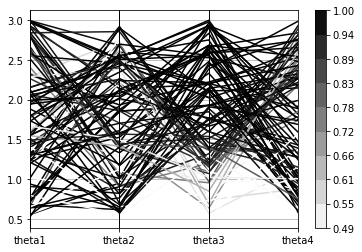

In [15]:
a = parallel_coordinates(df, 'accuracy', colormap="binary")